<a href="https://colab.research.google.com/github/Skamalesh05/Data-visualization-showcase/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

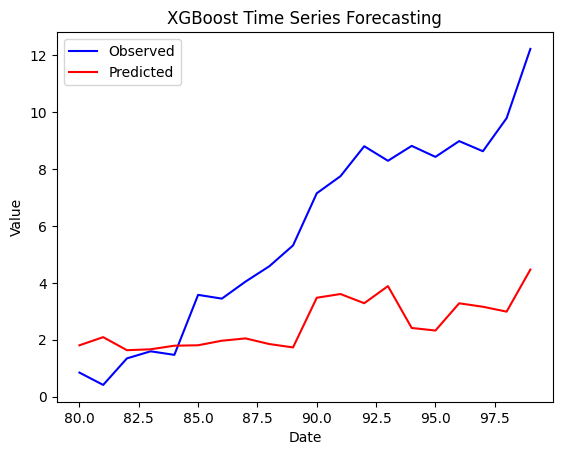

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load your actual time series data into a pandas DataFrame (replace this with your data)
# For demonstration purposes, let's create a sample dataset
date_range = pd.date_range(start='2022-01-01', periods=100, freq='D')
time_series_data = np.cumsum(np.random.randn(100))
df = pd.DataFrame({'date': date_range, 'target': time_series_data})

# Convert datetime column to features (year, month, day)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original datetime column
df.drop(columns=['date'], inplace=True)

# Split data into train and validation sets
train_size = int(0.8 * len(df))
train, val = df[:train_size], df[train_size:]

# Define features and target
X_train, y_train = train.drop(columns=['target']), train['target']
X_val, y_val = val.drop(columns=['target']), val['target']

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Visualize observed vs. predicted values
plt.plot(val.index, y_val, label='Observed', color='blue')
plt.plot(val.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('XGBoost Time Series Forecasting')
plt.legend()
plt.show()